This code ingests:

- JSON files from `people_in_images/json`, which contains many pieces of combined metadata from different sources.
    
And outputs:
    
- `face_counts/counts.npy` the total number of faces in each photo 
- `face_counts/categories.npy` the categorical total number of faces (5-7 faces, 8-14 faces, and 14+ faces are separate categories)
- `face_counts/category-descriptions.txt` the descriptions of the number of faces for each category bin

In [1]:
from utils.list_all_files import *
from utils.progress import *
import matplotlib.pyplot as plt
import numpy as np
import ujson as json
import re

input_dir = '../data/analysis/people_in_images/json'

def natural_sort_key(s, _nsre=re.compile('([0-9]+)')):
    return [int(text) if text.isdigit() else text.lower()
            for text in _nsre.split(s)]

def get_id(fn):
    return os.path.splitext(os.path.basename(fn))[0]

def job(task):
    data = json.load(open(task))
    return len(data['people'])

tasks = list(list_all_files(input_dir))
tasks.sort(key=lambda x: natural_sort_key(get_id(x)))
totals = progress_parallel(job, tasks)

59278 0:01:01 970.49/s


In [2]:
totals = np.asarray(totals)

In [3]:
tasks[np.where(totals == totals.max())[0][0]] # photo with the most people

'data/analysis/people_in_images/json/46539.json'

In [4]:
face_count, total_instances = np.unique(totals, return_counts=True)

In [5]:
list(zip(face_count, total_instances))[:10]

[(0, 3177),
 (1, 15848),
 (2, 7791),
 (3, 4494),
 (4, 3879),
 (5, 3073),
 (6, 2410),
 (7, 2057),
 (8, 1759),
 (9, 1544)]

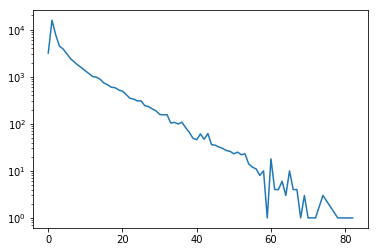

In [6]:
plt.plot(face_count, total_instances)
plt.yscale('log')
plt.show()

In [7]:
np.percentile(totals, 55)

4.0

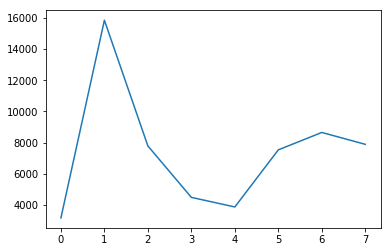

In [8]:
categories = np.copy(totals)
categories[totals > 4] = 5
categories[totals > 7] = 6
categories[totals > 14] = 7
plt.plot(*np.unique(categories, return_counts=True))
plt.show()

In [9]:
np.save('../data/analysis/face_counts/counts.npy', totals)

In [10]:
np.save('../data/analysis/face_counts/categories.npy', categories)

In [11]:
descriptions = ['0', '1', '2', '3', '4', '5-7', '8-13', '14+']
descriptions_fn = '../data/analysis/face_counts/category-descriptions.txt'
np.savetxt(descriptions_fn, descriptions, fmt='%s')